<a href="https://colab.research.google.com/github/codedmachine111/ML/blob/master/Creditcard_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install opendatasets -q
import opendatasets as od
od.download("https://www.kaggle.com/datasets/aniruddhachoudhury/creditcard-fraud-detection")

100%|██████████| 66.0M/66.0M [00:01<00:00, 64.0MB/s]


## What does our data look like?

In [3]:
df = pd.read_csv('/content/creditcard-fraud-detection/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
df.shape

(284807, 31)

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [7]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Visualizing our Data

<Axes: xlabel='Class', ylabel='count'>

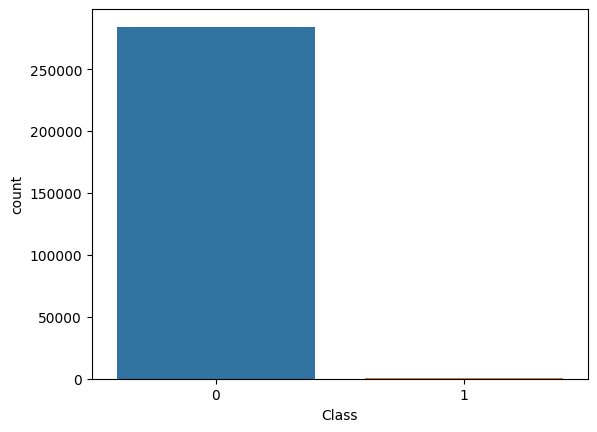

In [11]:
sns.countplot(x='Class', data=df)

- Highly imbalanced target variable

In [76]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

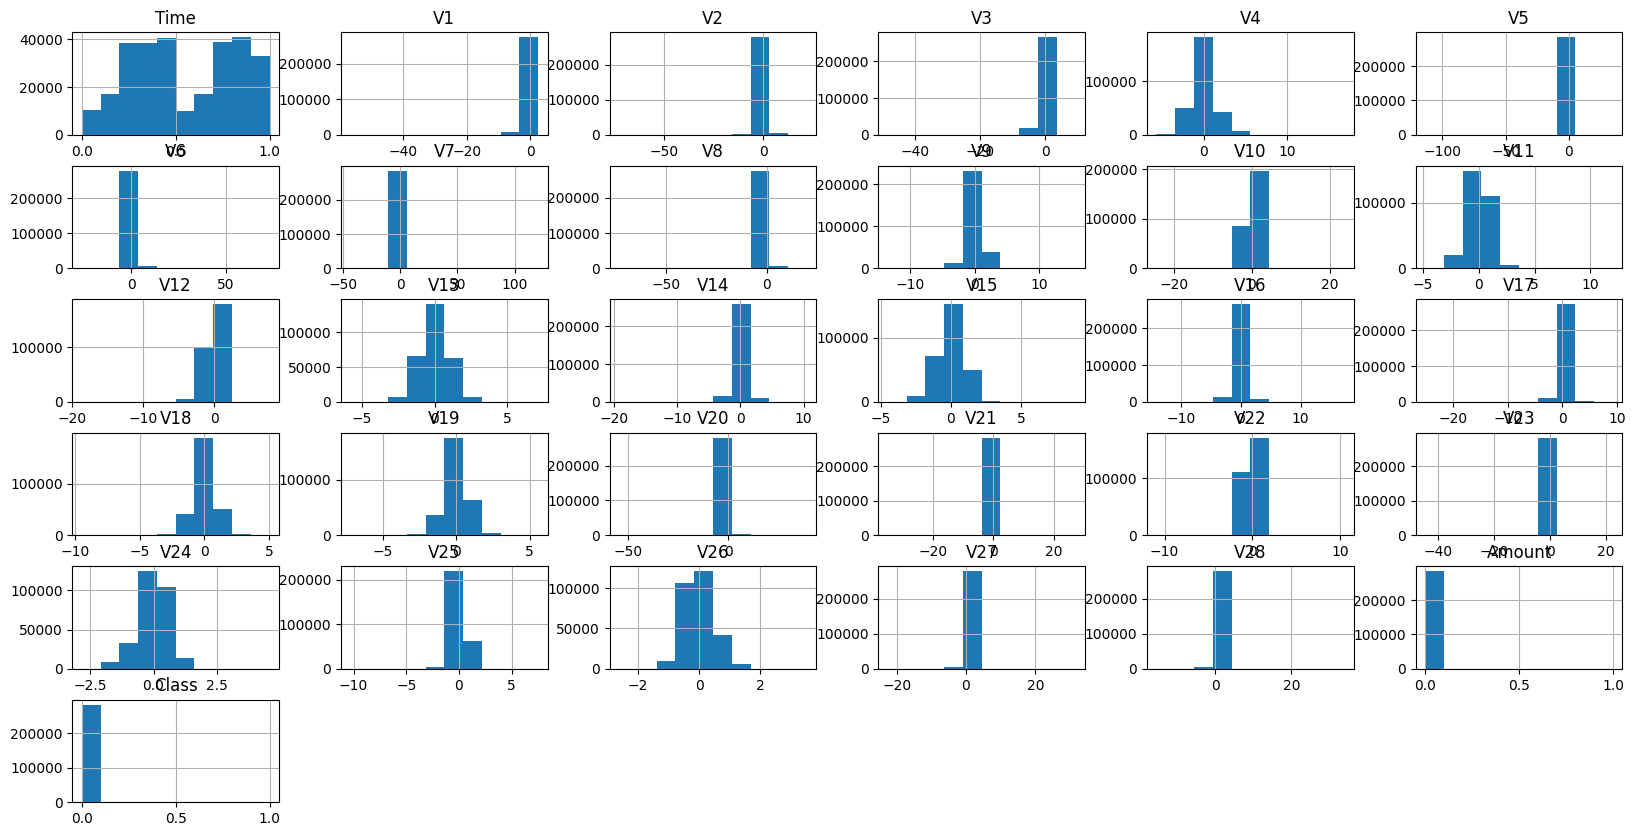

In [77]:
df.hist(figsize=(20,10));

- Need to scale Time and Amount so all features are on similar scale

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc_cols = ['Amount', "Time"]
df[sc_cols] = scaler.fit_transform(df[sc_cols])
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


- Checking correlation of `Class` with all columns

In [46]:
def all_correlation_with_target(df, target_column):
    correlations = df.corr()[[target_column]]

    for column, correlation in correlations.iterrows():
        if column != target_column:
            print(f'Correlation between {column} and {target_column}: {correlation.values[0]}')


In [47]:
all_correlation_with_target(df,'Class')

Correlation between Time and Class: -0.012322570929245828
Correlation between V1 and Class: -0.10134729859508294
Correlation between V2 and Class: 0.0912886503446179
Correlation between V3 and Class: -0.19296082706741602
Correlation between V4 and Class: 0.13344748623900718
Correlation between V5 and Class: -0.09497429899144802
Correlation between V6 and Class: -0.04364316069996494
Correlation between V7 and Class: -0.18725659151430013
Correlation between V8 and Class: 0.019875123914794384
Correlation between V9 and Class: -0.0977326860740807
Correlation between V10 and Class: -0.21688294364103206
Correlation between V11 and Class: 0.15487564474394433
Correlation between V12 and Class: -0.26059292487722485
Correlation between V13 and Class: -0.004569778799461309
Correlation between V14 and Class: -0.3025436958044028
Correlation between V15 and Class: -0.004223402267856675
Correlation between V16 and Class: -0.19653894030401736
Correlation between V17 and Class: -0.32648106724371595
Cor

- Filtering out strong correlated columns

In [54]:
def correlation_with_target(df, target_column, threshold):
    corr_cols = []
    corr = df.corr()[[target_column]]

    for column in corr.index:
        if column != target_column and abs(corr.loc[column, target_column]) > threshold:
            corr_cols.append(column)

    return corr_cols


In [55]:
corr_cols = correlation_with_target(df,'Class',0.15)
corr_cols

['V3', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']

<Axes: >

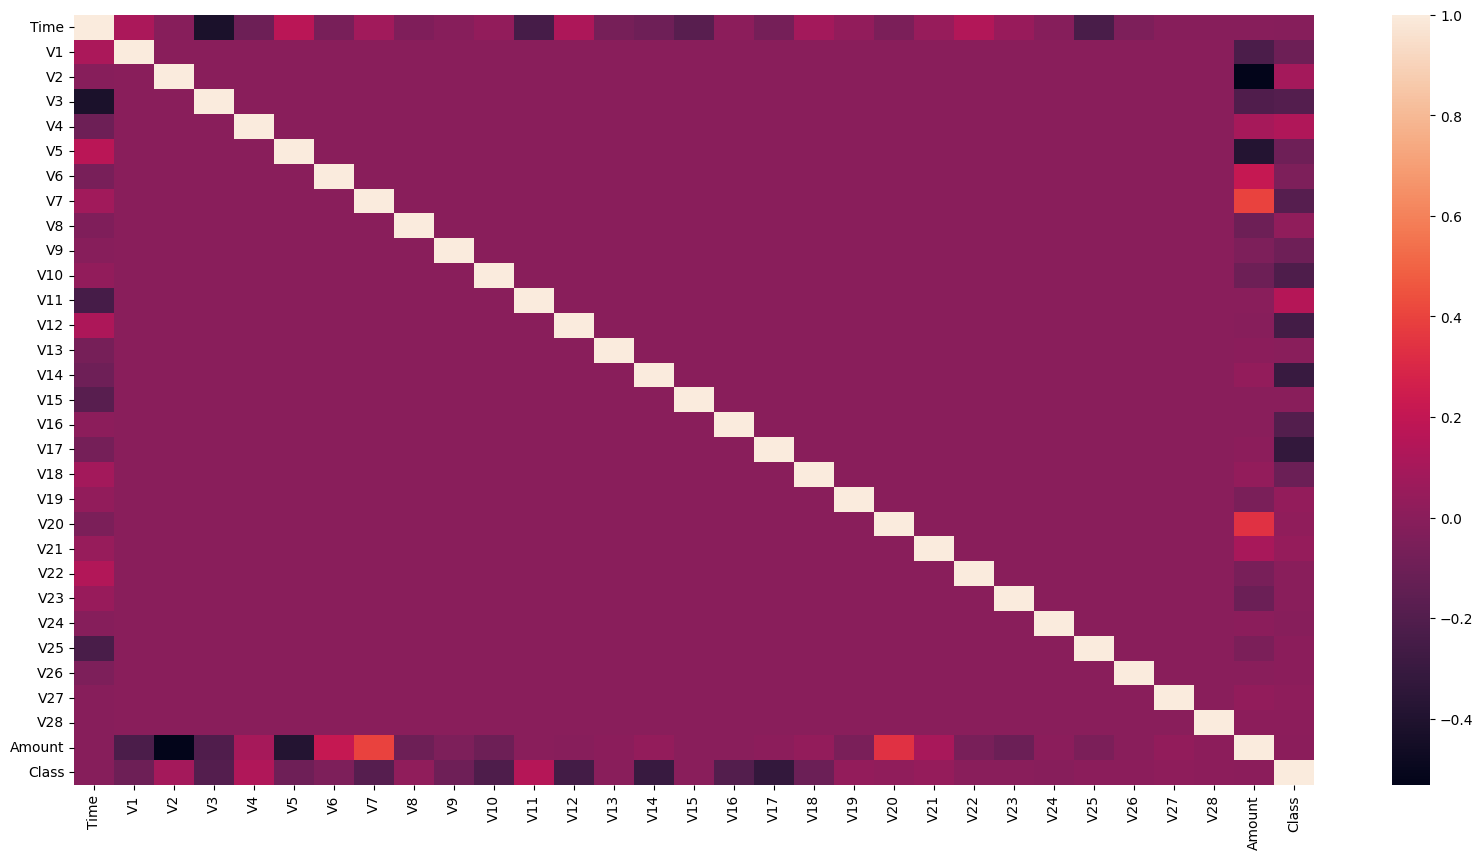

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=False)

- V3, V7, V10, V11, V12, V14, V16, and V17 have a more correlation with 'Class' column.

In [59]:
cols_to_keep = corr_cols
cols_to_keep.extend(['Class', 'Time'])
cols_to_keep

['V3', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'Class', 'Time']

In [61]:
df1 = df.filter(cols_to_keep)
df1.head()

,V3,V7,V10,V11,V12,V14,V16,V17,Class,Time
0,2.536347,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0,0.000000
1,0.166480,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0,0.000000
2,1.773209,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0,0.000006
3,1.792993,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0,0.000006
4,1.548718,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0,0.000012


## Splitting out data

In [63]:
from sklearn.model_selection import train_test_split
y = df1['Class']
X= df1.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((199364, 9), (85443, 9), (199364,), (85443,))

In [80]:
y_train.value_counts()

0    199008
1       356
Name: Class, dtype: int64

- Since Class is highly imabalanced we use SMOTE to oversample

In [68]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [98]:
X_train_sm.shape, y_train_sm.shape

((398016, 9), (398016,))

In [82]:
y_train_sm.value_counts()

0    199008
1    199008
Name: Class, dtype: int64

In [83]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [84]:
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

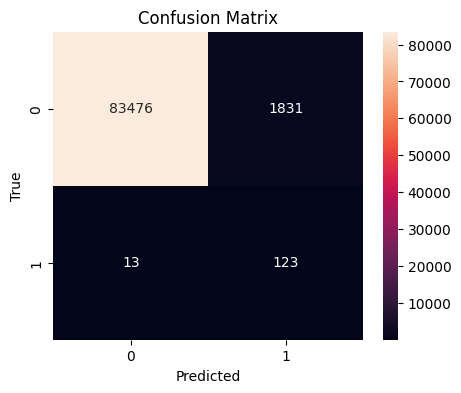

In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [89]:
acc = accuracy_score(y_test, y_pred)
acc

0.9784183607785307